# 1 import req lib

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv("C:/Users/Nihala Sherin A/Downloads/track_my_bus_passenger_dataset.csv")
df

,Bus_ID,Route_ID,Stop_ID,Latitude,Longitude,Day_Type,Hour,Distance_km,Traffic_Level,Bus_Capacity,Passenger_Count
0,B048,R3,S1,9.092386,74.197544,Weekday,12,13.23,High,50,49
1,B005,R3,S20,8.433561,74.707870,Weekday,20,13.80,Low,60,62
2,B026,R7,S15,9.267008,74.125261,Weekday,17,14.16,Low,60,74
3,B004,R9,S2,12.293522,74.913053,Weekday,20,5.89,Low,40,62
4,B020,R1,S17,10.582374,76.662323,Weekend,19,14.62,High,40,68
...,...,...,...,...,...,...,...,...,...,...,...
1995,B030,R10,S6,8.669577,75.747942,Weekday,19,7.62,Low,50,62
1996,B024,R1,S7,11.807051,77.704981,Weekday,10,6.41,Medium,60,65
1997,B024,R2,S15,8.712667,74.594113,Weekend,6,20.27,High,60,47
1998,B024,R9,S15,12.933870,74.443785,Weekend,13,6.53,High,60,44


In [56]:
df.head()

,Bus_ID,Route_ID,Stop_ID,Latitude,Longitude,Day_Type,Hour,Distance_km,Traffic_Level,Bus_Capacity,Passenger_Count
0,B048,R3,S1,9.092386,74.197544,Weekday,12,13.23,High,50,49
1,B005,R3,S20,8.433561,74.707870,Weekday,20,13.80,Low,60,62
2,B026,R7,S15,9.267008,74.125261,Weekday,17,14.16,Low,60,74
3,B004,R9,S2,12.293522,74.913053,Weekday,20,5.89,Low,40,62
4,B020,R1,S17,10.582374,76.662323,Weekend,19,14.62,High,40,68


# 2 EDA

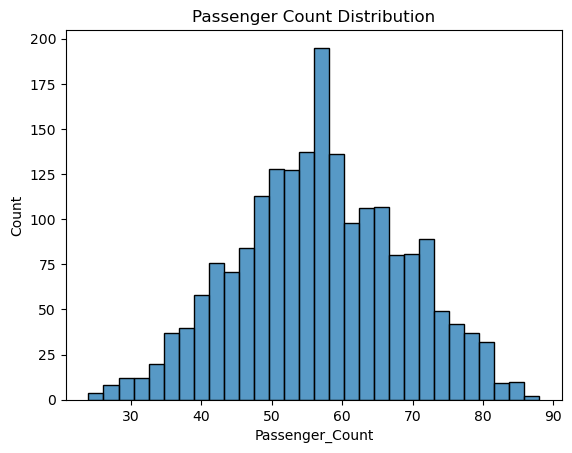

In [57]:
# passenger count distribution
plt.figure()
sns.histplot(df['Passenger_Count'], bins=30)
plt.title("Passenger Count Distribution")
plt.show()


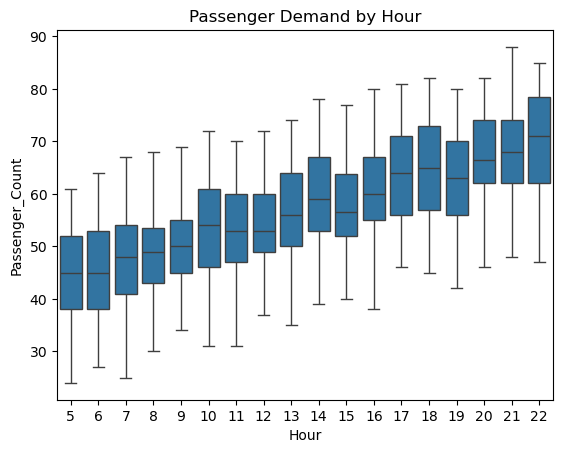

In [58]:
# passenger demand by hour
plt.figure()
sns.boxplot(x='Hour', y='Passenger_Count', data=df)
plt.title("Passenger Demand by Hour")
plt.show()

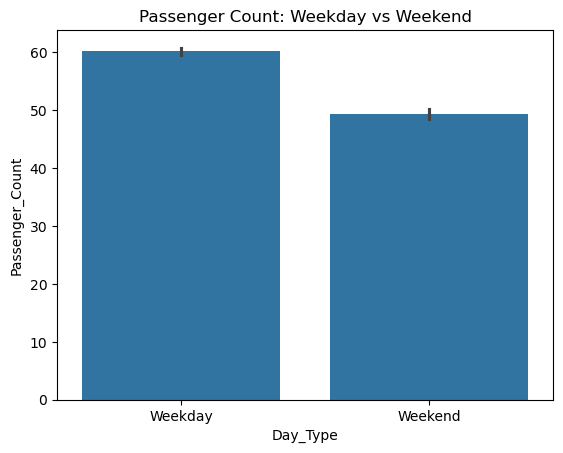

In [59]:
# weekday vs weekend passenger count
plt.figure()
sns.barplot(x='Day_Type', y='Passenger_Count', data=df)
plt.title("Passenger Count: Weekday vs Weekend")
plt.show()

# 3 Features eng

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Route_ID', 'Stop_ID', 'Day_Type', 'Traffic_Level']:
    df[col] = le.fit_transform(df[col])
x = df[['Route_ID', 'Stop_ID', 'Day_Type', 'Hour',
        'Distance_km', 'Traffic_Level', 'Bus_Capacity']]
y = df['Passenger_Count']    
    

# 4 Train Test

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=30)

# 5 Modeling

In [62]:
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train, y_train)
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# y_pred = lr.predict(X_test)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R2 Score:", r2)
# print(lr.score(X_test,y_test))

In [63]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# model = SVR(kernel='rbf', C=30, gamma='auto')

# model.fit(X_train, y_train)

# y_pred_svm = model.predict(X_test)

# # Evaluation
# print("MAE:", mean_absolute_error(y_test, y_pred_svm))
# print("RMSE:", mean_squared_error(y_test, y_pred_svm))
# print("R2 Score:", r2_score(y_test, y_pred_svm))


In [64]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state=30)
# rf.fit(X_train, y_train)

# y_pred_rf = rf.predict(X_test)

# print("Random Forest (Before Tuning)")
# print("MAE:", mean_absolute_error(y_test, y_pred_rf))
# print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
# print("R2:", r2_score(y_test, y_pred_rf))
# print(rf.score(X_test,y_test))

# 6 hyper parameter tuning

In [65]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# grid = GridSearchCV(
#     RandomForestRegressor(random_state=30),
#     param_grid,
#     cv=3,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1
# )

# print(grid.fit(X_train, y_train))
# print(grid.score(X_test,y_test))
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
model_params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}   # No hyperparameters for basic Linear Regression
    },
    
    'svr': {
        'model': SVR(),
        'params': {
            'C': [1, 10, 30],
            'gamma': ['scale', 'auto'],
            'kernel': ['rbf']
        }
    },
    
    'random_forest': {
        'model': RandomForestRegressor(random_state=30),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    }
}


In [66]:
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print("Best RMSE:", np.sqrt(-grid.best_score_))  #best score

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best RMSE: 7.808172418408631


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = best_model.predict(X_test)

print("Random Forest (Best Model After Hyperparameter Tuning)")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Random Forest (Best Model After Hyperparameter Tuning)
MAE: 6.456823112788807
RMSE: 7.687108779097274
R2 Score: 0.5935156829408974


In [68]:
df['Predicted_Passenger_Count'] = best_model.predict(x)
df.to_csv("passenger_demand_predictions.csv", index=False)

In [73]:
import numpy as np
import pandas as pd

y_pred = best_model.predict(X_test)

y_pred_int = np.round(y_pred).astype(int)


results_df = pd.DataFrame({
    "Actual Passenger Count": y_test.values if hasattr(y_test, "values") else y_test,
    "Predicted Passenger Count": y_pred_int
})

results_df



,Actual Passenger Count,Predicted Passenger Count
0,56,62
1,68,74
2,34,40
3,57,50
4,59,50
...,...,...
395,66,72
396,63,55
397,47,48
398,40,52


In [70]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump('best_model',file)
    


In [71]:
with open('model.pkl','rb')as file:
    mp=pickle.load(file)

In [72]:
pickle.dump(mp,open('scaler2.sav','wb'))
with open("scaler2.sav", "rb") as file:
    scaler = pickle.load(file)

Lowest RMSE = Best Model (usually Random Forest)